In [269]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import numpy as np
import os
# Files to load
city_data_to_load = "Resources/city_data.csv" 
ride_data_to_load = "Resources/ride_data.csv"

In [270]:
#reading the csv file and checking them
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [271]:
#reading the csv file and checking them
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [272]:
# cheaking to see is city_data needs cleaning but counting rows and checking for null values
print(city_data_df.count())
print(city_data_df.isnull().sum())
print(city_data_df.dtypes)
# seeing the unique values under type columb and counting how many rows are under each category
print(city_data_df["type"].unique())
print(sum(city_data_df["type"]=="Urban"))
print(sum(city_data_df["type"]=="Suburban"))
print(sum(city_data_df["type"]=="Rural"))


city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64
city            object
driver_count     int64
type            object
dtype: object
['Urban' 'Suburban' 'Rural']
66
36
18


In [273]:
# cheaking to see is ride_data needs cleaning but counting rows and checking for null values
print(ride_data_df.count())
print(ride_data_df.isnull().sum())
print(ride_data_df.dtypes)

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [274]:
#merging the 2 dataframes by city
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [275]:
#creating Series out of the main df for each type of city
urban_city_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_city_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_city_df = pyber_data_df[pyber_data_df["type"]== "Rural"]
rural_city_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [276]:
# Get the number of rides for city.
urban_ride_count = urban_city_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_city_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_city_df.groupby(["city"]).count()["ride_id"]

In [277]:
# Get average fare for each city in the type catagory.
urban_avg_fare = urban_city_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_city_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_city_df.groupby(["city"]).mean()["fare"]

In [278]:
# Get the average number of drivers for each city.
urban_drive_count = urban_city_df.groupby(["city"]).mean()["driver_count"]
rural_drive_count = rural_city_df.groupby(["city"]).mean()["driver_count"]
suburban_drive_count = suburban_city_df.groupby(["city"]).mean()["driver_count"]

<function matplotlib.pyplot.show(close=None, block=None)>

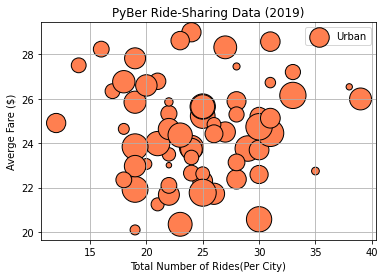

In [279]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = [i * 10 for i in urban_drive_count], 
            color="coral", 
            label = "Urban",
            edgecolor="black")
plt.legend()
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Averge Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

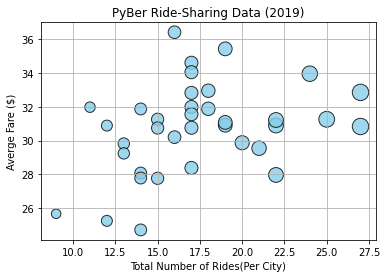

In [280]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = [ i * 10 for i in suburban_ride_count],
            label = "Suburban",
            color = "#87CEEB",
            edgecolor= "black",
            alpha=0.8)
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Averge Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

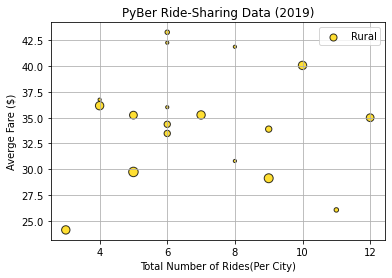

In [281]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s = [i * 10 for i in rural_drive_count],
            color = "gold",
            label = "Rural",
            edgecolor= "black",
            alpha=0.8)
plt.legend()
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Averge Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.show

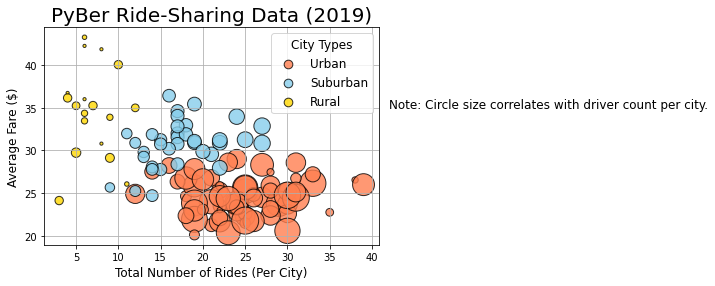

In [282]:
# Build the scatter charts for each city type.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = [i * 10 for i in urban_drive_count], 
            color="coral", 
            label = "Urban",
            edgecolor="black",
            alpha=0.8)
            
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = [ i * 10 for i in suburban_ride_count],
            label = "Suburban",
            color = "#87CEEB",
            edgecolor= "black",
            alpha=0.8)

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s = [i * 10 for i in rural_drive_count],
            color = "gold",
            label = "Rural",
            edgecolor= "black",
            alpha=0.8)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize= 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid()

#adding legend
# creating a legend
lgnd = plt.legend(fontsize = "12" , mode ="Expanded", scatterpoints = 1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#adding text to indicate circle size is driver count
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12" )
#SHOWING GRAPH
plt.show

# Save the figure.
plt.savefig("analysis/Fig1.png")